# **Introduction**

I'm just doing a fun exploratory analysis see what insights I can come up with with no guidance. I'll be mainly demonstrating data cleaning, dating analysis, data visualization, and not relying on SQL so much to become more efficient with Python functions.

About the data:

**This dataset contains fictional information about 50,000 songs from various music genres. I don't know how long the process of getting access to Spotify's API will take so this is my avenue at this point in time. ChatGPT was used to create the dataset.**

song_id: The unique identifier for the song.

song_title: The title of the song.

artist: The artist performing the song.

album: The album where the song is featured.

genre: The music genre of the song.

release_date: The release date of the song.

duration: The duration of the song (in seconds).

popularity: The popularity score of the song (1-100).

stream: The total number of streams for the song.

language: The language of the song.

explicit_content: Whether the song contains explicit content (e.g., inappropriate language).

label: The record label that published the song.

composer: The composer of the song.

producer: The producer of the song.

collaboration: Whether the song is a collaboration with other artists.


# Importing Libraries and Getting the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown #I like to separate outputs clearly.

print("libraries installed!")

libraries installed!


In [2]:
#Import the dataset into the notebook and assign it to a Dataframe variable.
df = pd.read_csv('/kaggle/input/spotify/spotify_songs_dataset.csv')

In [3]:
#View the dataset to ensure it imported correctly.
df.head(10)

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN
5,SP0006,Whatever Mr send.,Nathan King,Various experience.,Folk,2015-11-29,312.0,74,82613530,NaN,Yes,Indie,Brad Hicks,John Brown,NaN
6,SP0007,Each leg.,Joshua Santos,Determine.,Hip-Hop,1996-03-16,336.0,49,88337653,Japanese,No,Def Jam,Henry Willis,William Smith,NaN
7,SP0008,Person then enjoy.,Leonard Brown,Sense lot.,Hip-Hop,2017-08-14,237.0,9,95988275,English,No,Atlantic Records,Keith Horton,Justin Gonzalez,NaN
8,SP0009,Poor.,William Ford,Organization.,Pop,2002-02-28,NaN,74,67287444,Spanish,No,Warner Music,James Roth,Jeffrey Perry,NaN
9,SP0010,East husband.,Susan Harrell,List item.,Electronic,2016-12-06,216.0,2,48726791,English,Yes,Warner Music,Maria Castro,Justin Grant,NaN


Just from this small view, I can see some issues. There are periods attached to names, capitalized words, and missing variables, which could make the analysis more difficult to navigate. I'll start working towards removing the periods and standardizing the cases. Then I will find a solution for the missing values.

# **Data Cleaning!**

In [4]:
#Preliminary whitespace cleanup
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)


In [5]:
display(df.dtypes)
display(df.head())

song_id              object
song_title           object
artist               object
album                object
genre                object
release_date         object
duration            float64
popularity            int64
stream                int64
language             object
explicit_content     object
label                object
composer             object
producer             object
collaboration        object
dtype: object

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN


In [6]:
#lower all of the cases
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
display(df.head())

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,sp0001,space executive series.,sydney clark,what.,electronic,1997-11-08,282.0,42,35055874,english,yes,def jam,amy hatfield,jeffrey weaver,NaN
1,sp0002,price last painting.,connor peters dds,nature politics.,electronic,2015-05-10,127.0,50,9249527,english,yes,universal music,jason gregory,kenneth white,NaN
2,sp0003,piece.,anna keith,visit.,pop,2024-07-08,NaN,10,76669110,english,yes,universal music,rachel lopez,jason barnes,NaN
3,sp0004,power industry your.,zachary simpson,behavior evening.,hip-hop,2022-08-15,214.0,86,34732016,english,no,sony music,thomas li,mrs. becky palmer,NaN
4,sp0005,food animal second.,christopher mcgee,front.,pop,2023-03-05,273.0,63,96649372,english,yes,def jam,adam wagner,beverly baker,NaN


In [7]:
#Find all the null values.
df.isnull().sum()

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

In [8]:
#Duration should not be a null value for a song so I'm going to look a little closer to see what exactly is null.
df[df['duration'].isnull()]

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
2,sp0003,piece.,anna keith,visit.,pop,2024-07-08,NaN,10,76669110,english,yes,universal music,rachel lopez,jason barnes,NaN
8,sp0009,poor.,william ford,organization.,pop,2002-02-28,NaN,74,67287444,spanish,no,warner music,james roth,jeffrey perry,NaN
13,sp0014,floor someone minute.,christopher torres,few control.,pop,2008-06-04,NaN,62,7384310,english,yes,universal music,bruce bonilla,brandon smith,NaN
33,sp0034,side.,mrs. jessica cole,old.,hip-hop,2002-03-04,NaN,99,20875976,french,no,indie,angela chambers,william alexander,sara rogers
58,sp0059,build part central.,jacob meyers,everybody.,hip-hop,2002-01-12,NaN,74,92195780,NaN,yes,sony music,ashley williamson,tristan moran,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,sp49940,future.,curtis castro,seek.,jazz,2004-07-01,NaN,100,46092847,french,yes,indie,richard banks,virginia reynolds,NaN
49942,sp49943,offer television.,brian peterson,check everything.,folk,2011-07-22,NaN,60,79744687,english,no,universal music,darryl barnes,beth barton,NaN
49961,sp49962,candidate apply never.,stephen thomas,network moment.,classical,2005-10-20,NaN,56,71520846,english,no,universal music,jennifer johnson md,james moore,NaN
49967,sp49968,serve sell subject.,edward patterson,control.,pop,2011-04-10,NaN,29,65772603,spanish,yes,atlantic records,autumn steele,jimmy schmidt,NaN


In [9]:
#Create a view of what the distribution of null values are among the different genres.
null_genre_distribution = df[df['duration'].isnull()]['genre'].value_counts() #Creating a unique variable for the results incase I need it again.
print(null_genre_distribution)

genre
electronic    1267
pop           1226
hip-hop       1211
folk           273
classical      272
jazz           259
country        232
r&b            155
reggae         105
Name: count, dtype: int64


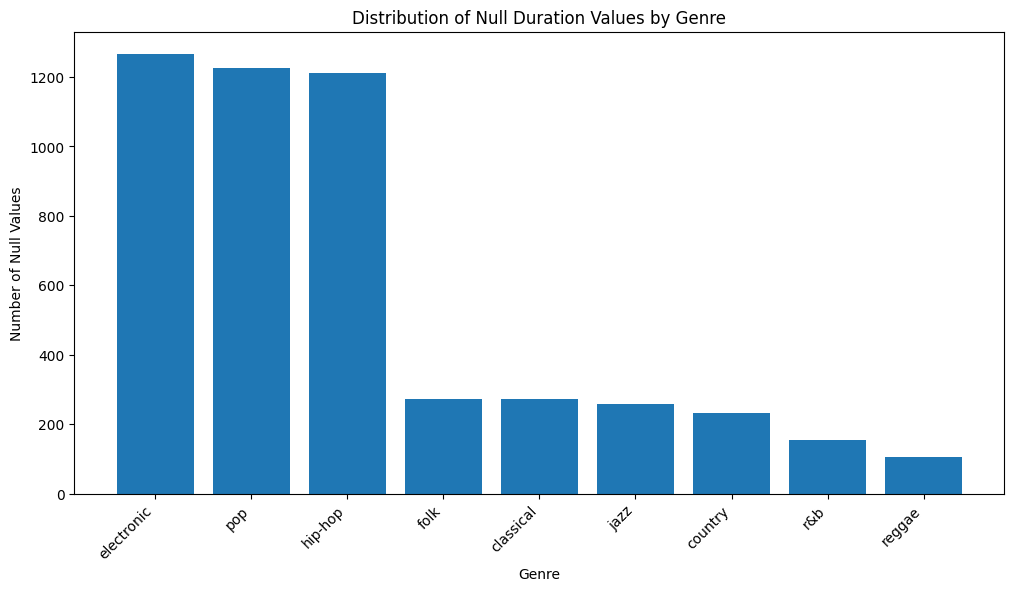

In [10]:
#Visualize these numbers in a bar chart.
plt.figure(figsize=(12, 6))
plt.bar(null_genre_distribution.index, null_genre_distribution.values)
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better readability
plt.xlabel('Genre')
plt.ylabel('Number of Null Values')
plt.title('Distribution of Null Duration Values by Genre')
plt.show()

This probably isn't necessaary but I wonder if there is a even-ish distribution of null values versus the amount of tracks in the genre.

I can see this by calculating the percentage of of null values in each genre.

In [11]:
#Total count of songs per genre.
genre_total = df['genre'].value_counts()

#Count of null durations per genre.
null_duration_count = df[df['duration'].isnull()]['genre'].value_counts()

#Calculate the percentage of nulls for each genre.
null_percentage = (null_duration_count / genre_total) * 100

#Display as a sorted DataFrame for better readability.
null_percentage_df = null_percentage.reset_index()
null_percentage_df.columns = ['Genre', 'Null_Percentage']
null_percentage_df = null_percentage_df.sort_values(by='Null_Percentage', ascending=False)

print(null_percentage_df)


        Genre  Null_Percentage
8      reggae        10.813594
0   classical        10.700236
3        folk        10.668230
5        jazz        10.343450
7         r&b        10.244547
2  electronic        10.081158
4     hip-hop         9.847130
6         pop         9.781395
1     country         9.239347


In [12]:
print(null_percentage_df['Null_Percentage'].mean())

10.19100970819246


Close to 10% null value in each genre is good enough for me to be comfortable replacing the null values in the duration column with the mean duration of their respective genres.

In [13]:
#Calculate the mean duration for each genre
mean_duration_by_genre = df.groupby('genre')['duration'].transform('mean')

#Replace null values in the duration column with the mean duration of their respective genres
df['duration'] = df['duration'].fillna(mean_duration_by_genre)

#Verify if null values have been replaced
print(df['duration'].isnull().sum())  #Should output 0 if all nulls are handled


0


In [14]:
df.isnull().sum()

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration                0
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

I'm not concerned with languages being null. Collaboration nulls however, I'd assume that just means there actually was no collab on the song and personally, I'd rather it say something definitive.

In [15]:
#Replace the value of collaboration nulls with "none"
df['collaboration'] = df['collaboration'].fillna("none")

#Check to see if my replacement was done correctly and I didnt replace EVERYTHING lol
df.head(20)

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,sp0001,space executive series.,sydney clark,what.,electronic,1997-11-08,282.000000,42,35055874,english,yes,def jam,amy hatfield,jeffrey weaver,none
1,sp0002,price last painting.,connor peters dds,nature politics.,electronic,2015-05-10,127.000000,50,9249527,english,yes,universal music,jason gregory,kenneth white,none
2,sp0003,piece.,anna keith,visit.,pop,2024-07-08,238.903077,10,76669110,english,yes,universal music,rachel lopez,jason barnes,none
3,sp0004,power industry your.,zachary simpson,behavior evening.,hip-hop,2022-08-15,214.000000,86,34732016,english,no,sony music,thomas li,mrs. becky palmer,none
4,sp0005,food animal second.,christopher mcgee,front.,pop,2023-03-05,273.000000,63,96649372,english,yes,def jam,adam wagner,beverly baker,none
5,sp0006,whatever mr send.,nathan king,various experience.,folk,2015-11-29,312.000000,74,82613530,NaN,yes,indie,brad hicks,john brown,none
6,sp0007,each leg.,joshua santos,determine.,hip-hop,1996-03-16,336.000000,49,88337653,japanese,no,def jam,henry willis,william smith,none
7,sp0008,person then enjoy.,leonard brown,sense lot.,hip-hop,2017-08-14,237.000000,9,95988275,english,no,atlantic records,keith horton,justin gonzalez,none
8,sp0009,poor.,william ford,organization.,pop,2002-02-28,238.903077,74,67287444,spanish,no,warner music,james roth,jeffrey perry,none
9,sp0010,east husband.,susan harrell,list item.,electronic,2016-12-06,216.000000,2,48726791,english,yes,warner music,maria castro,justin grant,none


In [16]:
df.isnull().sum()

song_id                0
song_title             0
artist                 0
album                  0
genre                  0
release_date           0
duration               0
popularity             0
stream                 0
language            2500
explicit_content       0
label                  0
composer               0
producer               0
collaboration          0
dtype: int64

Now that null values are handled, I'll convert the duration times to whole numbers and remove the periods from the song_title and album columns.

In [17]:
#Check if the column can be converted simply.
df.dtypes

song_id              object
song_title           object
artist               object
album                object
genre                object
release_date         object
duration            float64
popularity            int64
stream                int64
language             object
explicit_content     object
label                object
composer             object
producer             object
collaboration        object
dtype: object

In [18]:
#Convert the values in the column to whole numbers. They're integers now.
df['duration'] = df['duration'].round().astype(int)
#Confirm the numbers in the duration column are integers.
print(df['duration'].head())


0    282
1    127
2    239
3    214
4    273
Name: duration, dtype: int64


I've only observed unnecessary periods in the song_title and album columns. But to be safe, I think it's fine to remove the periods from all non-numerical columns. 

In [19]:
#We'll remove the periods by looping the function in columns that contain text data types (object and string).
for col in df.select_dtypes(include=['object', 'string']).columns:
    df[col] = df[col].str.replace('.', '', regex=False)
#Check my work
df.head(10)


,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,sp0001,space executive series,sydney clark,what,electronic,1997-11-08,282,42,35055874,english,yes,def jam,amy hatfield,jeffrey weaver,none
1,sp0002,price last painting,connor peters dds,nature politics,electronic,2015-05-10,127,50,9249527,english,yes,universal music,jason gregory,kenneth white,none
2,sp0003,piece,anna keith,visit,pop,2024-07-08,239,10,76669110,english,yes,universal music,rachel lopez,jason barnes,none
3,sp0004,power industry your,zachary simpson,behavior evening,hip-hop,2022-08-15,214,86,34732016,english,no,sony music,thomas li,mrs becky palmer,none
4,sp0005,food animal second,christopher mcgee,front,pop,2023-03-05,273,63,96649372,english,yes,def jam,adam wagner,beverly baker,none
5,sp0006,whatever mr send,nathan king,various experience,folk,2015-11-29,312,74,82613530,NaN,yes,indie,brad hicks,john brown,none
6,sp0007,each leg,joshua santos,determine,hip-hop,1996-03-16,336,49,88337653,japanese,no,def jam,henry willis,william smith,none
7,sp0008,person then enjoy,leonard brown,sense lot,hip-hop,2017-08-14,237,9,95988275,english,no,atlantic records,keith horton,justin gonzalez,none
8,sp0009,poor,william ford,organization,pop,2002-02-28,239,74,67287444,spanish,no,warner music,james roth,jeffrey perry,none
9,sp0010,east husband,susan harrell,list item,electronic,2016-12-06,216,2,48726791,english,yes,warner music,maria castro,justin grant,none


This concludes cleaning.

# **General Exploration**
1. What are the most streamed songs, artists, and albums?
2. What are the longest and shortest songs?
3. Which genres have the most songs?



## What are the most streamed songs, artists, and albums?

In [20]:
#Finding the most streamed songs, artists, and albums. Let's keep it simple and find the top 5 for each, starting with streams.
#Sort the DataFrame by 'stream' in descending order.
df_sorted_streams = df.sort_values(by='stream', ascending=False)

#Select the top 5 songs.
df_streams_top5 = df_sorted_streams.head(5)

df_streams_top5 = df_streams_top5[['song_title', 'artist','genre','stream']].head()

df_streams_top5



,song_title,artist,genre,stream
9924,development once,catherine anderson,folk,99999128
41189,lot religious,selena perez,classical,99998468
38231,certain why,thomas roach,electronic,99996451
1607,next face,jason strickland,electronic,99993859
467,which hand relationship,monica stevens,electronic,99992156


I'm glad this is fictional data because a Folk song being the most streamed song is nuts.

In [21]:
#Finding the most streamed artist

#Assign a variable to grouped dataframe.
artist_streams = df.groupby('artist')['stream'].sum()

#Sort the resulting Series by total streams in descending order
sorted_artist_streams = artist_streams.sort_values(ascending=False)

#Limit the output to the top 5 artists
artist_streams_top5 = sorted_artist_streams.head(5)

#Convert to a DataFrame for visual consistency
artist_streams_top5 = pd.DataFrame(artist_streams_top5).reset_index()

#Rename columns for clarity
artist_streams_top5.columns = ['Artist', 'Total Streams']

#Display the sorted results
artist_streams_top5


,Artist,Total Streams
0,michael smith,1216955786
1,michael johnson,1133916570
2,david jones,1070218401
3,john smith,1029655656
4,robert williams,954086347


An interesting observation is that none of these artists have a top 5 song.

In [22]:
#Finding the most streamed album
#Assign a variable to grouped dataframe.
album_streams = df.groupby(['album','artist'])['stream'].sum()

#Sort the resulting Series by total streams in descending order
sorted_album_streams = album_streams.sort_values(ascending=False)

#Limit the output to the top 5 artists
album_streams_top5 = sorted_album_streams.head(5)

#Convert to a DataFrame for visual consistency
album_streams_top5 = pd.DataFrame(album_streams_top5).reset_index()

#Rename columns for clarity
album_streams_top5.columns = ['Album', 'Artist', 'Total Streams']

#Display the sorted results
album_streams_top5


,Album,Artist,Total Streams
0,today,robert williams,177448826
1,while,thomas davis,148377336
2,dream,joshua smith,116527102
3,late,michael brown,112238234
4,our,michael clark,100385797


,song_title,artist,genre,stream
9924,development once,catherine anderson,folk,99999128
41189,lot religious,selena perez,classical,99998468
38231,certain why,thomas roach,electronic,99996451
1607,next face,jason strickland,electronic,99993859
467,which hand relationship,monica stevens,electronic,99992156


-----

,Artist,Total Streams
0,michael smith,1216955786
1,michael johnson,1133916570
2,david jones,1070218401
3,john smith,1029655656
4,robert williams,954086347


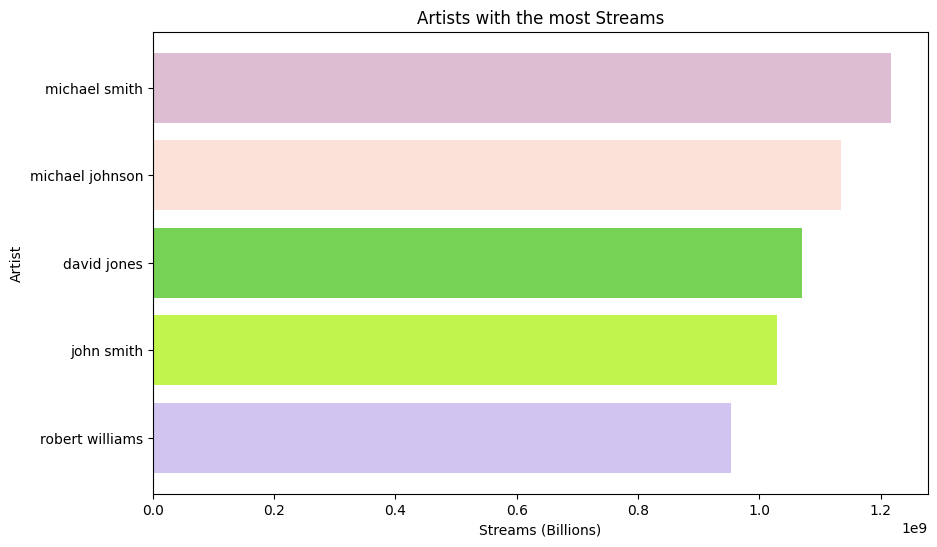

----

,Album,Artist,Total Streams
0,today,robert williams,177448826
1,while,thomas davis,148377336
2,dream,joshua smith,116527102
3,late,michael brown,112238234
4,our,michael clark,100385797


In [23]:
#I only need to display relevant information

display(df_streams_top5)
display(Markdown('-----'))
display(artist_streams_top5)

#Horizontal bar chart for fun
plt.figure(figsize=(10, 6))
colors = np.random.rand(len('Artist'), 4)
plt.barh(
    y=artist_streams_top5['Artist'],  # Artists on the y-axis
    width=artist_streams_top5['Total Streams'],  # Total Streams on the x-axis
    align='center',
    color=colors
)
plt.title("Artists with the most Streams")
plt.ylabel("Artist")
plt.xlabel("Streams (Billions)")
plt.gca().invert_yaxis()

plt.show()
display(Markdown('----'))

display(album_streams_top5)

In [24]:
#For funsies. Let's see which artists apparently suck the most.

#Assign a variable to grouped dataframe.
bad_artist_streams = df.groupby('artist')['stream'].sum()

#Sort the resulting Series by total streams in ascending order
sorted_bad_artist_streams = bad_artist_streams.sort_values(ascending=True)

#Limit the output to the top 5 artists
bad_artist_streams_bottom5 = sorted_bad_artist_streams.head(5)

#Convert to a DataFrame for visual consistency
bad_artist_streams_bottom5 = pd.DataFrame(bad_artist_streams_bottom5).reset_index()

display(bad_artist_streams_bottom5)


,artist,stream
0,justin bird jr,1899
1,heather carrillo,2458
2,peter stone,3853
3,tonya calderon,7952
4,deborah brown,8206


To be objective, they probably aren't bad--they could just have a small following.

## What are the longest and shortest songs?

In [25]:
#Find the song with the longest duration
longest_song = df.loc[df['duration'].idxmax(), ['song_title', 'duration']]

#Convert to a DataFrame for visual consistency
longest_song = pd.DataFrame([longest_song])

#Rename the columns for clarity
longest_song.columns = ['Song', 'Duration']

#Find the song with the shortest duration
shortest_song = df.loc[df['duration'].idxmin(), ['song_title', 'duration']]

#Convert to a DataFrame for visual consistency
shortest_song = pd.DataFrame([shortest_song])

#Rename the columns for clarity
shortest_song.columns = ['Song', 'Duration']

#Display results
title1 = "Longest Song on Spotify"
print(title1)
display(longest_song)
display(Markdown("---"))
title2 = "Shortest Song on Spotify"
print(title2)
display(shortest_song)


Longest Song on Spotify


,Song,Duration
26856,teach choice,433


---

Shortest Song on Spotify


,Song,Duration
43711,lead specific call,33


## Which genres have the most songs?

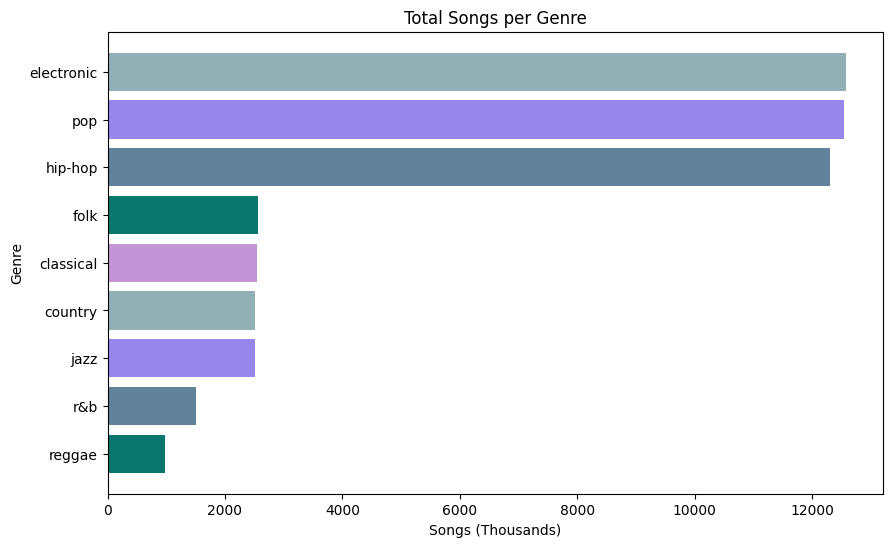

In [26]:
#Get the numbers for each genre.
genre_count = df['genre'].value_counts()
genre_count = pd.DataFrame(genre_count).reset_index()
genre_count.columns = ['Genre', 'Total Songs']
genre_count

#Horizontal bar chart for fun
plt.figure(figsize=(10, 6))
colors = np.random.rand(len('Genre'), 3)
plt.barh(
    y=genre_count['Genre'], 
    width=genre_count['Total Songs'],
    align='center',
    color=colors
)
plt.title("Total Songs per Genre")
plt.ylabel("Genre")
plt.xlabel("Songs (Thousands)")
plt.gca().invert_yaxis()

plt.show()

# **Genre-Based Analysis**
1. Which genres have the highest average popularity?
2. Are certain genres dominated by a specific record label?
3. Do certain genres have longer or shorter song durations on average?
4. How does explicit content vary by genre?



## Which genres have the highest average popularity?

In [27]:
#Finding which genres are the most popular. 
#From this point I won't be annotating every step I take unless I its something I haven't demonstrated up to this point.
avg_genre_popularity = df.groupby('genre')['popularity'].mean().round(2).reset_index()
avg_genre_popularity = avg_genre_popularity.sort_values(by='popularity',ascending=False)
avg_genre_popularity.columns = ['Genre', 'Average Popularity']
avg_genre_popularity

,Genre,Average Popularity
1,country,51.66
3,folk,51.47
4,hip-hop,50.92
2,electronic,50.85
6,pop,50.68
5,jazz,50.43
7,r&b,50.34
8,reggae,49.95
0,classical,49.65


## Are certain genres dominated by a specific record label?

In [28]:
#Are genres dominated by a specific record label?
label_genre_dist = df.groupby('genre')['label'].value_counts().reset_index()
print(label_genre_dist)

         genre             label  count
0    classical      warner music    456
1    classical        sony music    451
2    classical           def jam    439
3    classical             indie    410
4    classical   universal music    407
5    classical  atlantic records    379
6      country  atlantic records    435
7      country        sony music    428
8      country      warner music    416
9      country           def jam    415
10     country   universal music    411
11     country             indie    406
12  electronic           def jam   2152
13  electronic             indie   2117
14  electronic  atlantic records   2096
15  electronic      warner music   2093
16  electronic   universal music   2063
17  electronic        sony music   2047
18        folk        sony music    444
19        folk           def jam    442
20        folk   universal music    437
21        folk      warner music    419
22        folk             indie    412
23        folk  atlantic records    405


This is a lot of data visualize. I think pie charts for each genre and what the label composition is is easily consumable. Or a mutli-bar graph. I'll do both.

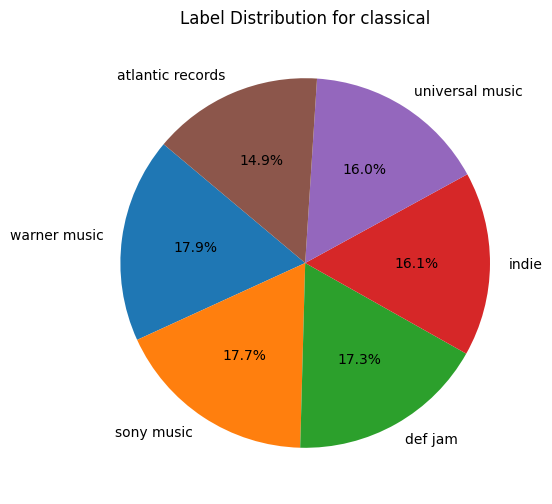

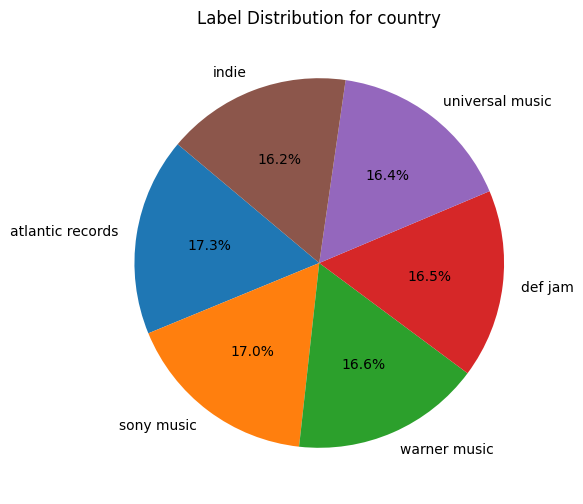

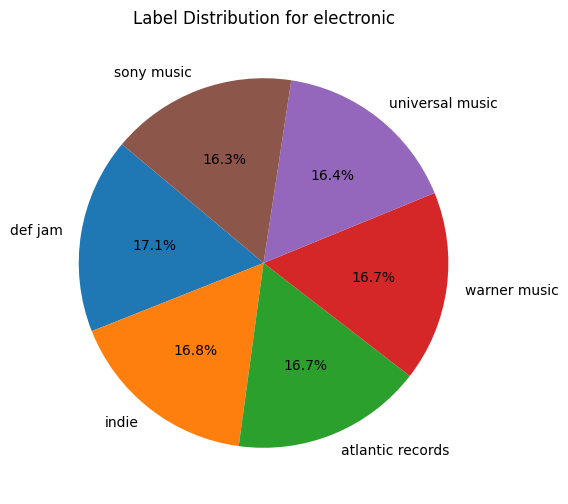

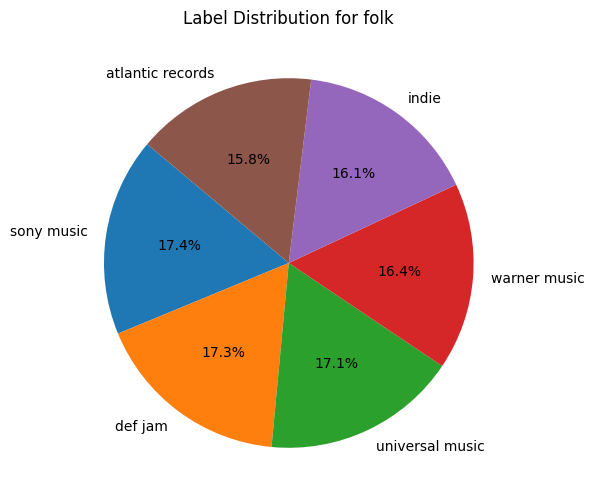

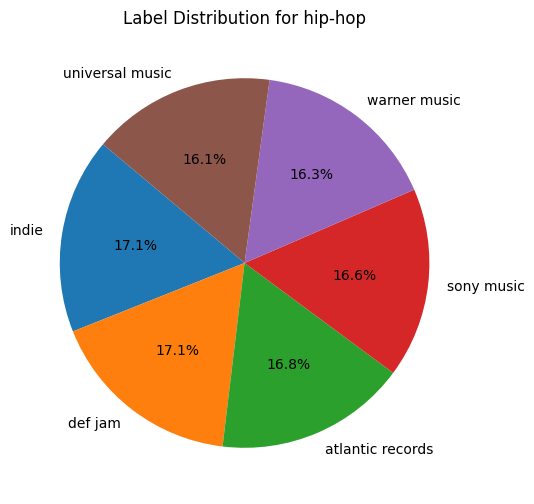

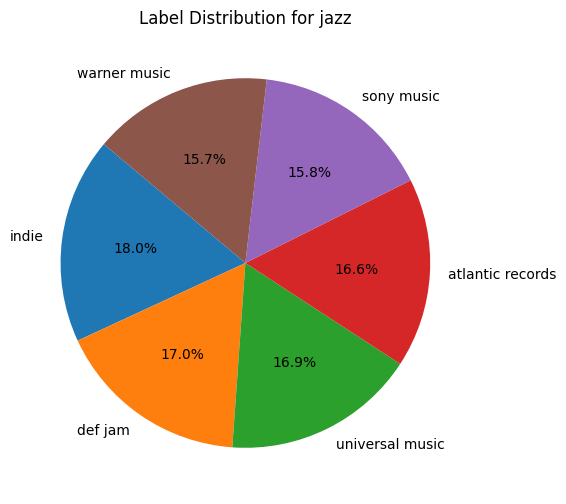

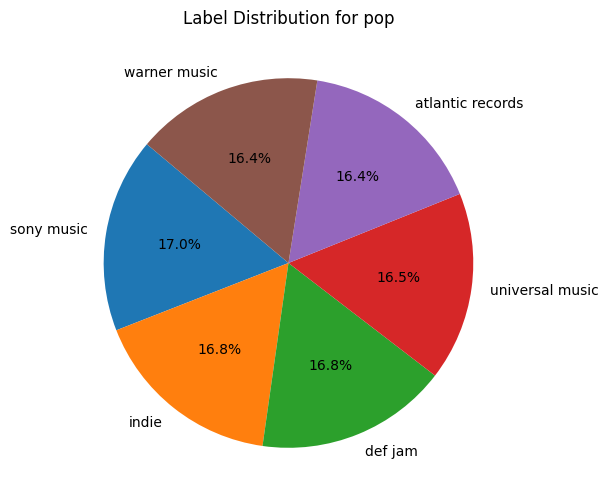

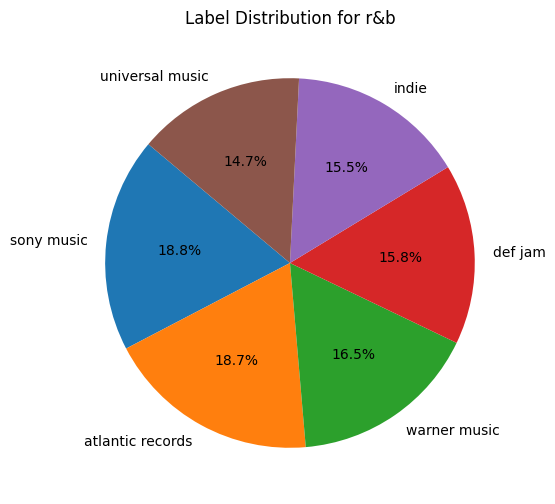

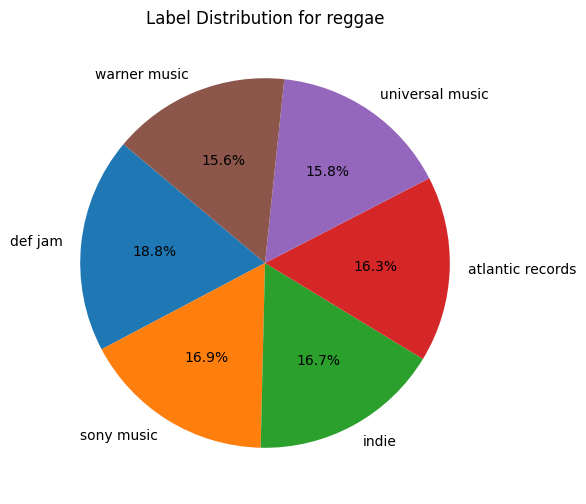

In [29]:
#Looping pie charts seems like the easiest thing to do first.

#Becasue theres repeat names, I need to group the genres.
grouped_genres = label_genre_dist.groupby('genre')
for genre, data in grouped_genres:
    plt.figure(figsize=(6, 6))
    plt.pie(
        data['count'], 
        labels=data['label'], 
        autopct='%1.1f%%', 
        startangle=140
    )
    plt.title(f"Label Distribution for {genre}")
    plt.show()



It's at this point that I realize there is not enough randomness in this dataset. Which is fine, this notebook for practicing Python more than looking for insights and such. Forward, to the bar chart.

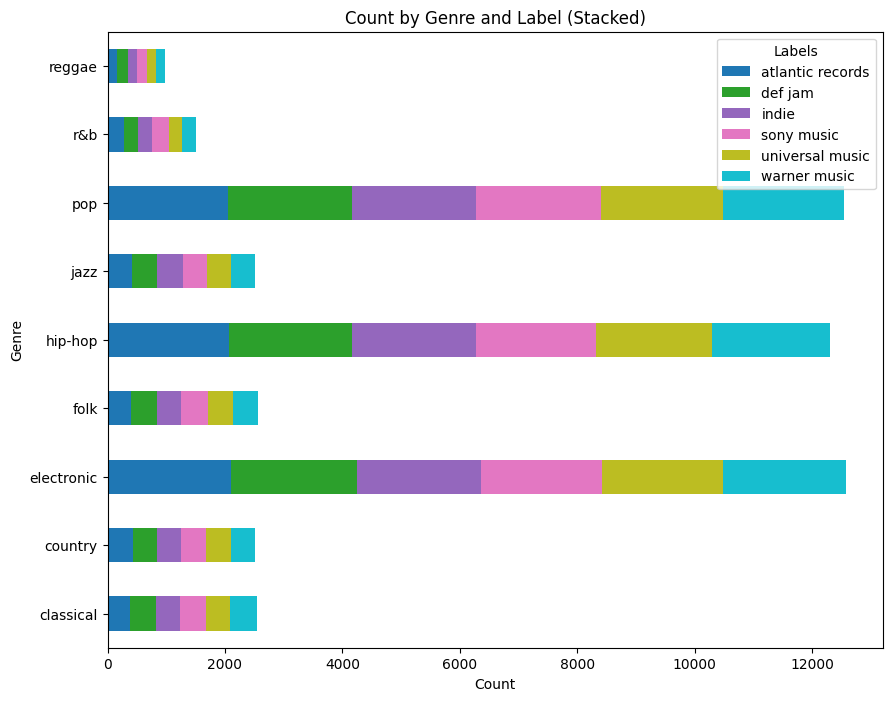

In [30]:
#Plot a grouped horizontal bar chart
#pivot() reshapes the dataframe in a way that I can visualize the distribution of labels in the genre

pivot_data = label_genre_dist.pivot(index='genre', columns='label', values='count').fillna(0)

# Plot a stacked bar chart
pivot_data.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='tab10')

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Count by Genre and Label (Stacked)")
plt.legend(title="Labels", loc="upper right") #Adding loc allows me the generally move the legend.
plt.show()




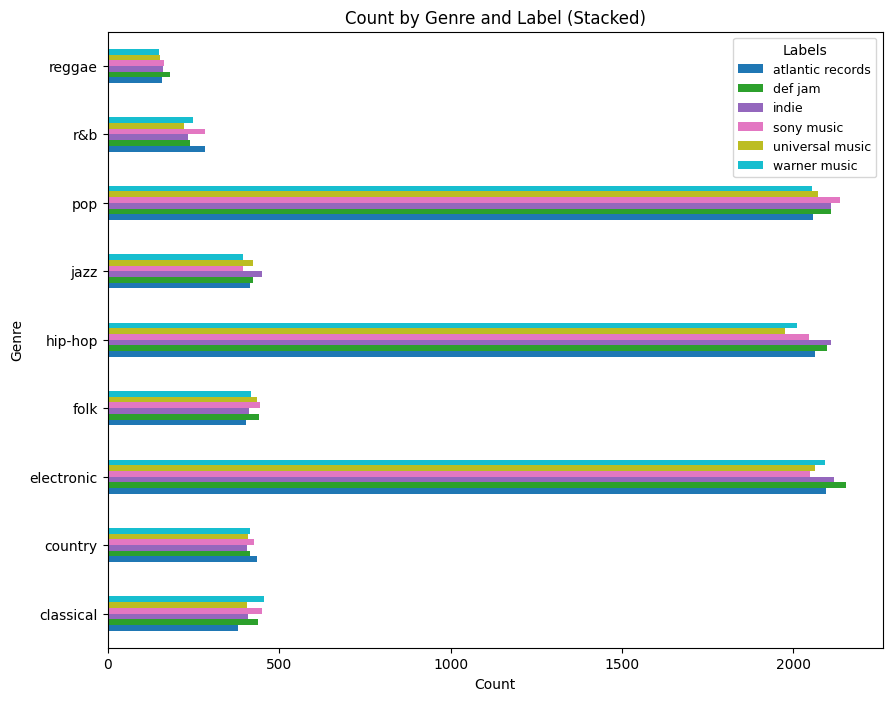

In [31]:
#Plot a grouped bar chart. (Same formula, just set stack to false)

# Plot a stacked bar chart
pivot_data.plot(kind='barh', stacked=False, figsize=(10, 8), colormap='tab10')

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Count by Genre and Label (Stacked)")
plt.legend(title="Labels", fontsize=9, loc="upper right") #Changing fontsize allowed me to make the legend smaller.
plt.show()

You can see that some labels have more songs in a certain genre but its not enough to consider the genre dominated by the label.

## Do certain genres have longer or shorter song durations on average?

        Genre  Average Duration
0   classical        239.226200
1     country        238.808841
2  electronic        240.326305
3        folk        240.273154
4     hip-hop        239.564075
5        jazz        240.362220
6         pop        238.912558
7         r&b        240.294118
8      reggae        240.859938


----

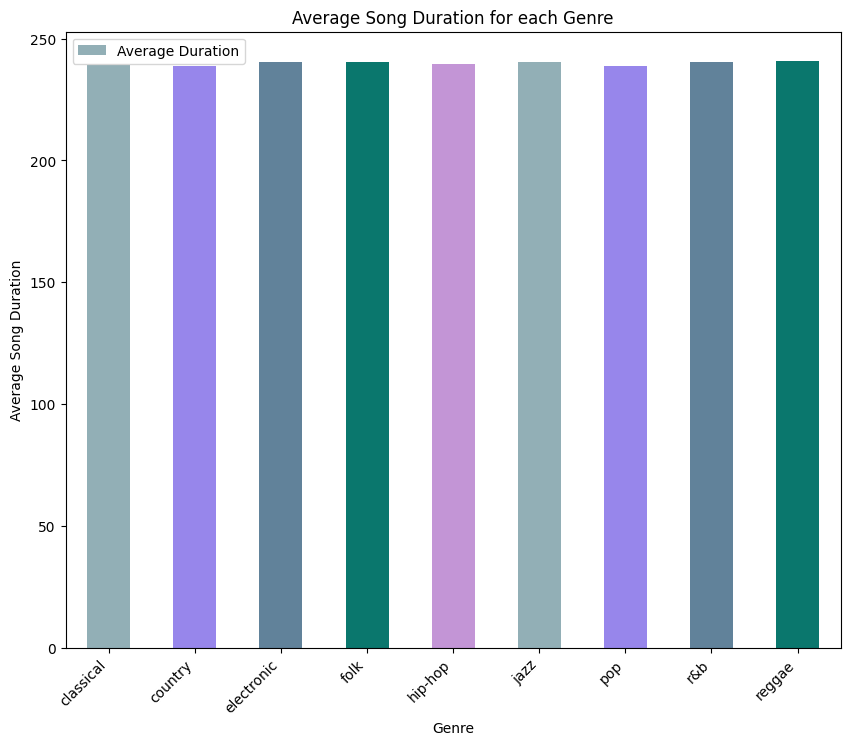

In [32]:
#Find the average duration time for each genre
avg_genre_duration = df.groupby('genre')['duration'].mean().reset_index()
avg_genre_duration.columns = ['Genre', 'Average Duration']
print(avg_genre_duration)
display(Markdown('----'))
#Going to make a bar chart to display difference.
avg_genre_duration.plot(kind='bar', x='Genre', y='Average Duration', figsize=(10, 8), color=colors)

# Add labels and title
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better readability
plt.xlabel("Genre")
plt.ylabel("Average Song Duration")
plt.title("Average Song Duration for each Genre")
plt.show()

## How does explicit content vary by genre?

In [33]:
display(df.head())
print(df.dtypes)


,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,sp0001,space executive series,sydney clark,what,electronic,1997-11-08,282,42,35055874,english,yes,def jam,amy hatfield,jeffrey weaver,none
1,sp0002,price last painting,connor peters dds,nature politics,electronic,2015-05-10,127,50,9249527,english,yes,universal music,jason gregory,kenneth white,none
2,sp0003,piece,anna keith,visit,pop,2024-07-08,239,10,76669110,english,yes,universal music,rachel lopez,jason barnes,none
3,sp0004,power industry your,zachary simpson,behavior evening,hip-hop,2022-08-15,214,86,34732016,english,no,sony music,thomas li,mrs becky palmer,none
4,sp0005,food animal second,christopher mcgee,front,pop,2023-03-05,273,63,96649372,english,yes,def jam,adam wagner,beverly baker,none


song_id             object
song_title          object
artist              object
album               object
genre               object
release_date        object
duration             int64
popularity           int64
stream               int64
language            object
explicit_content    object
label               object
composer            object
producer            object
collaboration       object
dtype: object


In [34]:
#We need to group explicit content counts to the genre.
#The values in explicit_content are not integers so I need to count the occurences of yes and no

explicit_counts = df.groupby(['genre', 'explicit_content']).size().reset_index(name='count') #.size() counts all rows in each group, regardless of what kind of value is in them.
display(explicit_counts)


,genre,explicit_content,count
0,classical,no,1257
1,classical,yes,1285
2,country,no,1208
3,country,yes,1303
4,electronic,no,6324
5,electronic,yes,6244
6,folk,no,1276
7,folk,yes,1283
8,hip-hop,no,6124
9,hip-hop,yes,6174


In [35]:
#I think answering this question would be better represented in percentages for each genre.
#pivot() to create a table with 'yes' and 'no' counts per genre
explicit_pivot = explicit_counts.pivot(index='genre', columns='explicit_content', values='count').fillna(0)

#Calculate the percentage of explicit content ("yes")
explicit_pivot['explicit_percentage'] = (explicit_pivot['yes'] / explicit_pivot.sum(axis=1)) * 100

# Display the percentage for debugging
print(explicit_pivot.head())


explicit_content    no   yes  explicit_percentage
genre                                            
classical         1257  1285            50.550747
country           1208  1303            51.891677
electronic        6324  6244            49.681731
folk              1276  1283            50.136772
hip-hop           6124  6174            50.203285


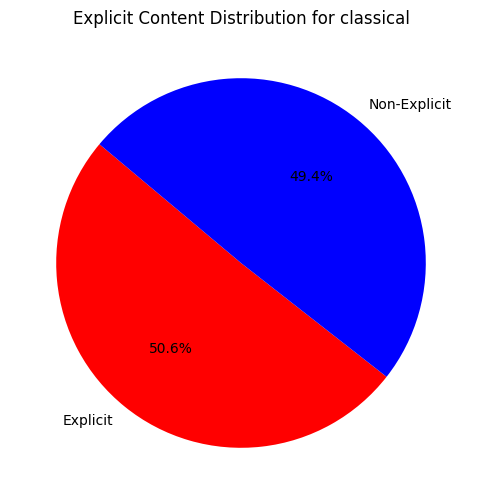

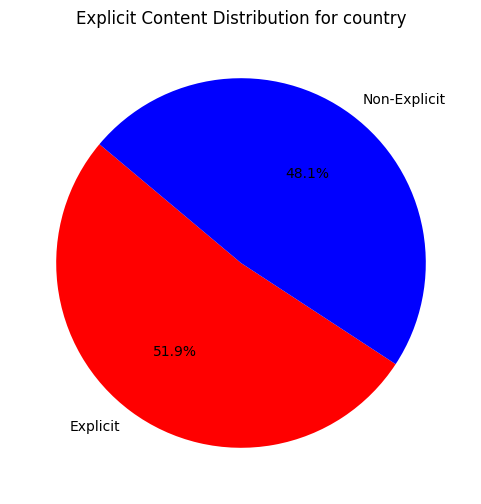

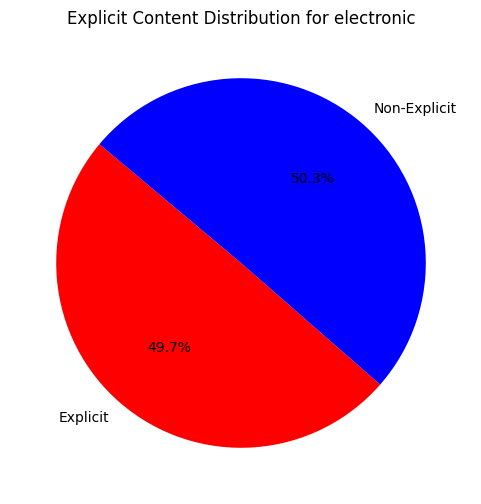

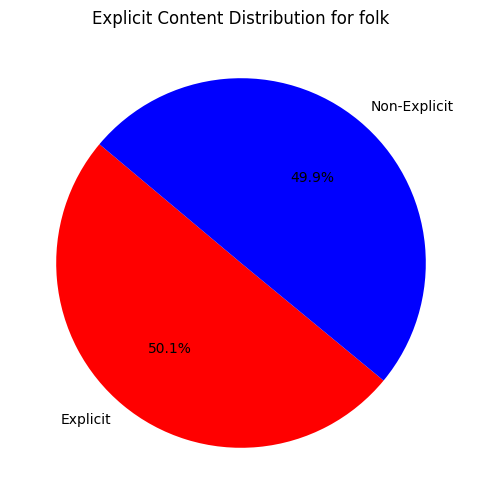

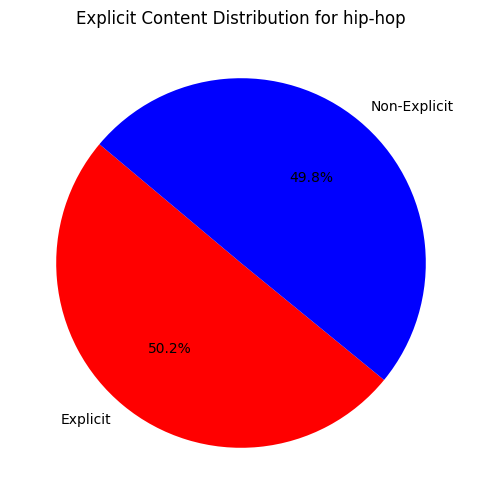

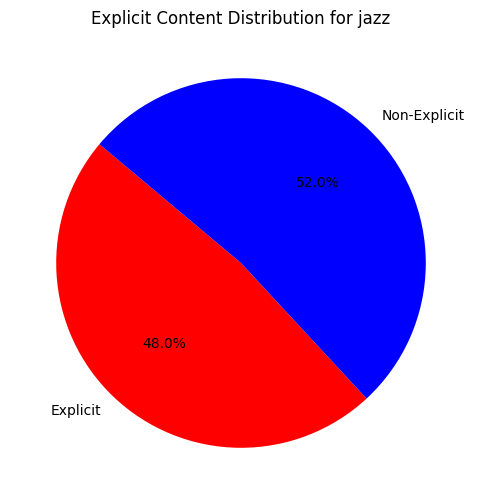

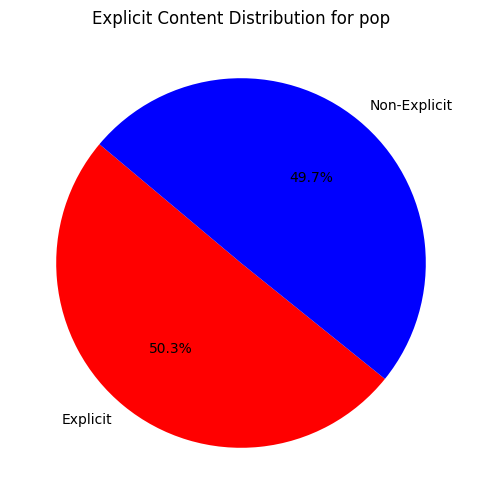

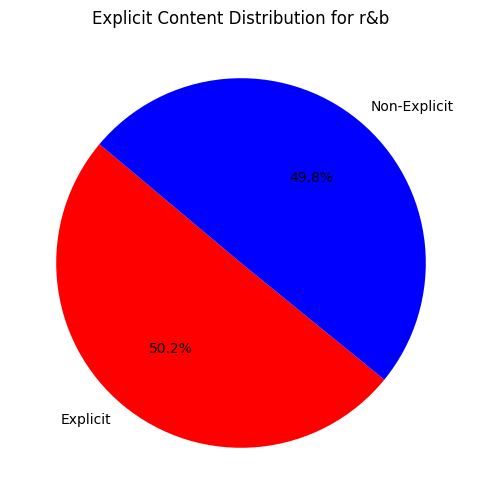

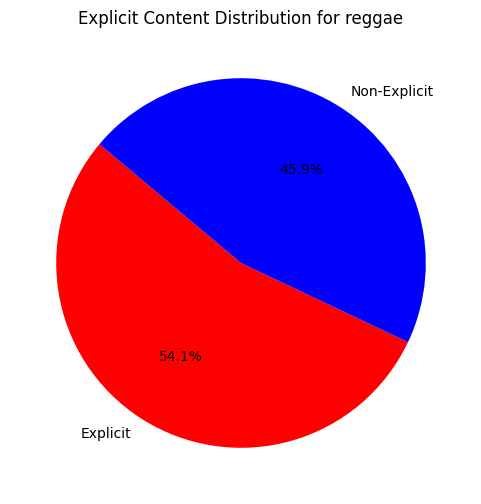

In [36]:
#Let's loop a pie chart for each genre.

for genre, row in explicit_pivot.iterrows():
    labels = ['Explicit', 'Non-Explicit'] #Self-explanatory (I actually came back to add this lol)
    values = [row['yes'], row['no']]
    
    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
    plt.title(f"Explicit Content Distribution for {genre}")
    plt.show()


Very interesting that reggae has the largest portion of explicit content, if only by a small margin.

# **Artist and Collaboration Analysis**

1.	How do collaborations impact popularity?
2.	Which artists and producers work together most often?



## How do collaborations impact popularity?

In [37]:
df.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,sp0001,space executive series,sydney clark,what,electronic,1997-11-08,282,42,35055874,english,yes,def jam,amy hatfield,jeffrey weaver,none
1,sp0002,price last painting,connor peters dds,nature politics,electronic,2015-05-10,127,50,9249527,english,yes,universal music,jason gregory,kenneth white,none
2,sp0003,piece,anna keith,visit,pop,2024-07-08,239,10,76669110,english,yes,universal music,rachel lopez,jason barnes,none
3,sp0004,power industry your,zachary simpson,behavior evening,hip-hop,2022-08-15,214,86,34732016,english,no,sony music,thomas li,mrs becky palmer,none
4,sp0005,food animal second,christopher mcgee,front,pop,2023-03-05,273,63,96649372,english,yes,def jam,adam wagner,beverly baker,none


### Large Adjustment 1

In [38]:
#I think an efficient way to answer this question is by finding the mean popularity score for songs that have collaborations and ones that don't.
#Group by collaboration and calculate the mean popularity

#collaboration_impact = df.groupby('collaboration')['popularity'].mean().reset_index
#print(collaboration_impact)

#I got a 14,000 row answer. I realized making a different dataframe where replacing the names in the collaboration column with "yes" could be the way to go.
#I looked up how to replace values in this manner and found that I can still use conditional filtering here.

#Update values to "yes" where the column does not contain "none"
#Create a new DataFrame by copying the original
new_df = df.copy()

#Replace values in the 'collaboration' column for the new DataFrame
new_df.loc[new_df['collaboration'] != 'none', 'collaboration'] = 'yes'

new_df.head()


,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,sp0001,space executive series,sydney clark,what,electronic,1997-11-08,282,42,35055874,english,yes,def jam,amy hatfield,jeffrey weaver,none
1,sp0002,price last painting,connor peters dds,nature politics,electronic,2015-05-10,127,50,9249527,english,yes,universal music,jason gregory,kenneth white,none
2,sp0003,piece,anna keith,visit,pop,2024-07-08,239,10,76669110,english,yes,universal music,rachel lopez,jason barnes,none
3,sp0004,power industry your,zachary simpson,behavior evening,hip-hop,2022-08-15,214,86,34732016,english,no,sony music,thomas li,mrs becky palmer,none
4,sp0005,food animal second,christopher mcgee,front,pop,2023-03-05,273,63,96649372,english,yes,def jam,adam wagner,beverly baker,none


In [39]:
#Awesome, let's try the original function again.
collaboration_impact = new_df.groupby('collaboration')['popularity'].mean()
collaboration_impact = pd.DataFrame(collaboration_impact).reset_index() #Its just more visually appealing to me.
collaboration_impact.columns = ['Collab?', 'Average Popularity Score']
display(collaboration_impact)


,Collab?,Average Popularity Score
0,none,50.875029
1,yes,50.569733


Collabs apparently do not impact popularity in this dataset lol

## Which artists and producers work together most often?

In [40]:
#We'll see if we can analyze a trend after using previous techniques with the grouping.
#Using .size() again because the values are unique.
artist_producer_counts = df.groupby(['artist', 'producer']).size().reset_index(name='count')
artist_producer_counts = artist_producer_counts.sort_values(by='count', ascending=False)

# Display the result
display(artist_producer_counts)


,artist,producer,count
42758,sarah stewart,angela martin,2
0,aaron aguilar,angela ramsey,1
33336,melanie mckay,rachel kim,1
33327,melanie kelley,steven spears,1
33328,melanie kennedy,david williams,1
...,...,...,...
16668,gabriela hughes,elizabeth lowe,1
16669,gabriela jimenez,christopher santiago,1
16670,gabriela jones,nancy cobb,1
16671,gabriela nelson,tiffany thomas,1


In [41]:
#Need to verify something.
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
display(df['artist'].value_counts())
#ARE THERE REALLY THIS MANY UNIQUE ARTISTS?

artist
michael smith          23
michael johnson        20
john smith             20
david jones            19
christopher johnson    17
                       ..
harry duarte            1
cassandra edwards       1
kelli garcia            1
jenna martinez          1
leah coleman            1
Name: count, Length: 40182, dtype: int64

In [42]:
artist_song_count = df.groupby('artist').size().reset_index(name='song_count')
display(artist_song_count)
#What even is this dataset

,artist,song_count
0,aaron aguilar,1
1,aaron alvarez,2
2,aaron anderson,3
3,aaron bailey,2
4,aaron baker,2
...,...,...
40177,zoe mcintyre,1
40178,zoe terry,1
40179,zoe thomas,1
40180,zoe tucker,1


In [43]:
display(df_sorted_streams)
#ok wow, so those top streams from earlier were one hit wonders.

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
9924,sp9925,development once,catherine anderson,similar,folk,2003-05-03,236,80,99999128,english,yes,sony music,whitney jackson,elizabeth walker,none
41189,sp41190,lot religious,selena perez,billion,classical,2016-09-20,312,10,99998468,NaN,no,warner music,alex adams,betty edwards,none
38231,sp38232,certain why,thomas roach,appear trouble,electronic,2002-04-17,189,25,99996451,english,yes,warner music,ryan reed,carl schwartz,none
1607,sp1608,next face,jason strickland,those task,electronic,1995-11-24,187,81,99993859,japanese,no,indie,patrick brooks,mark cobb,none
467,sp0468,which hand relationship,monica stevens,each season,electronic,2012-05-17,187,8,99992156,english,no,sony music,terri osborn,lauren reed,joseph bender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44093,sp44094,car though,deborah brown,paper real,pop,2012-03-02,254,70,8206,french,yes,def jam,david freeman,timothy davis,none
46683,sp46684,serious material,tonya calderon,guess smile,hip-hop,2002-10-05,249,76,7952,english,yes,atlantic records,taylor taylor,mrs kayla powers,none
37715,sp37716,require always pass,peter stone,ground,jazz,2015-11-16,208,92,3853,english,no,warner music,monique clark,dawn brown,none
35948,sp35949,get school coach consider,heather carrillo,account,electronic,2011-12-24,230,2,2458,english,no,sony music,erin fisher,alexander copeland,none


**There is exactly one duo that has worked together more than once. sarah stewart, angela martin**

# **Trends Over Time**
Trends Over Time
1. Are there trends in song duration over time?
2.	Do newer songs tend to have higher popularity scores?



## Are there trends in song duration over time?

In [44]:
#Trends in song duration over time?
#I need to create a new column that only displays the year from the release_date column.
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df.head()
#For consistency, I want the dates together so I'll relocate the release_year column.
df.insert(5, 'release_year', df.pop('release_year'))

#Check my work
df.head()

,song_id,song_title,artist,album,genre,release_year,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,sp0001,space executive series,sydney clark,what,electronic,1997,1997-11-08,282,42,35055874,english,yes,def jam,amy hatfield,jeffrey weaver,none
1,sp0002,price last painting,connor peters dds,nature politics,electronic,2015,2015-05-10,127,50,9249527,english,yes,universal music,jason gregory,kenneth white,none
2,sp0003,piece,anna keith,visit,pop,2024,2024-07-08,239,10,76669110,english,yes,universal music,rachel lopez,jason barnes,none
3,sp0004,power industry your,zachary simpson,behavior evening,hip-hop,2022,2022-08-15,214,86,34732016,english,no,sony music,thomas li,mrs becky palmer,none
4,sp0005,food animal second,christopher mcgee,front,pop,2023,2023-03-05,273,63,96649372,english,yes,def jam,adam wagner,beverly baker,none


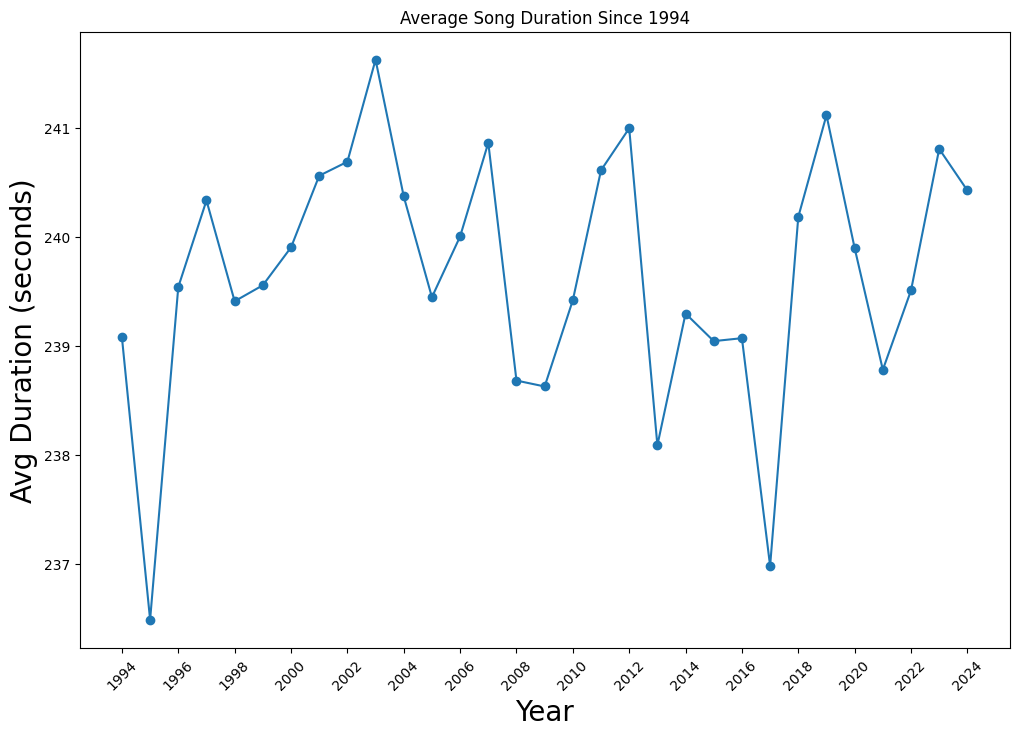

In [45]:
#A line graph will show us the trend over time. But first, lets calculate the average duration for every year.
avg_dur_year = df.groupby('release_year')['duration'].mean().reset_index()
avg_dur_year = pd.DataFrame(avg_dur_year)

#Plot the line graph from the dataframe›
plt.figure(figsize=(12, 8))
plt.plot(avg_dur_year['release_year'], avg_dur_year['duration'], marker='o')
plt.xticks(avg_dur_year['release_year'] [::2], rotation=45)
plt.xlabel("Year", fontsize=20) 
plt.ylabel("Avg Duration (seconds)", fontsize=20)  
plt.title("Average Song Duration Since 1994") 
plt.show()

### **Large Adjustment 2**

At first glance, this graph looks very dramatic. But we're looking at the difference between a total of a few seconds. Also, we're plotting fractions, which also needs to be fixed. These factors skew the visual. I need to adjust the dataframe and Y axis to make it less dramatic.

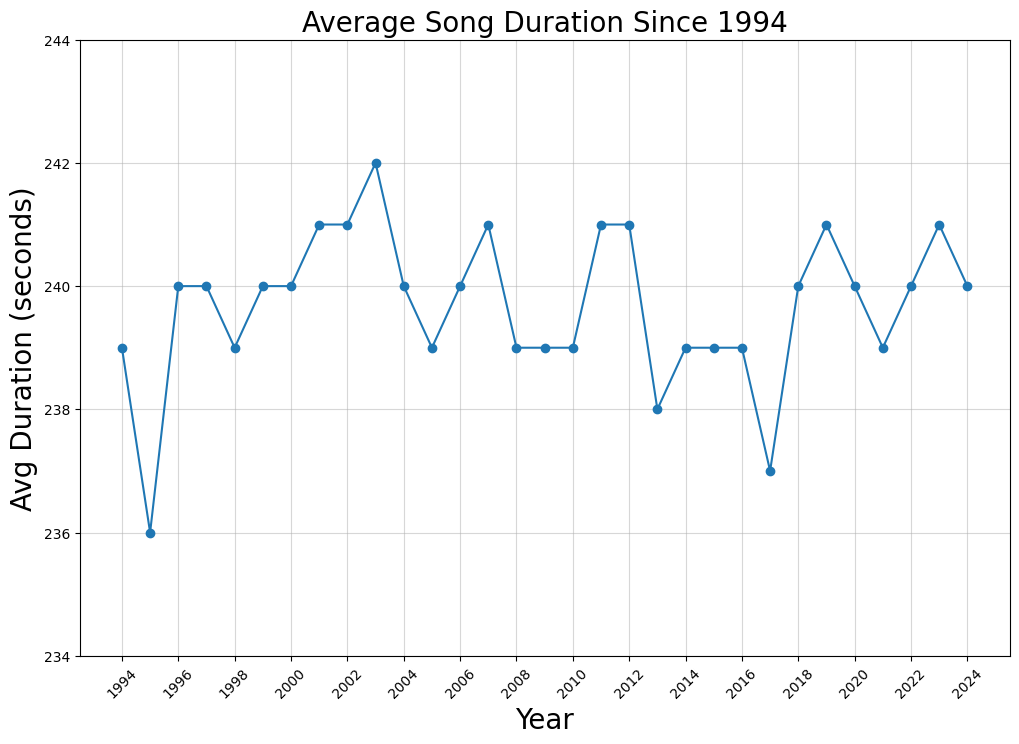

In [46]:
#We need to make sure the duration column is rounded to the nearest whole number
avg_dur_year2 = df.groupby('release_year')['duration'].mean().round().astype('int').reset_index()
avg_dur_year2 = pd.DataFrame(avg_dur_year2)

#Nothing changes here
plt.figure(figsize=(12, 8))
plt.plot(avg_dur_year2['release_year'], avg_dur_year2['duration'], marker='o')
plt.xticks(avg_dur_year2['release_year'][::2], rotation=45)  # Show every other year for clarity

#Adjust y-axis to reduce dramatic effect
plt.ylim(avg_dur_year2['duration'].min() - 2, avg_dur_year2['duration'].max() + 2)  # Add a small buffer
plt.xlabel("Year", fontsize=20)
plt.ylabel("Avg Duration (seconds)", fontsize=20)
plt.title("Average Song Duration Since 1994", fontsize=20)
plt.grid(alpha=0.5)  # Add grid for better readability
plt.show()

This looks a lot less dramatic but let's see them side by side.

### Subplot Example

Because I want to show the graphs side by side, I need to use a subplot function, which means using a different set of functions to recreate the graphs.

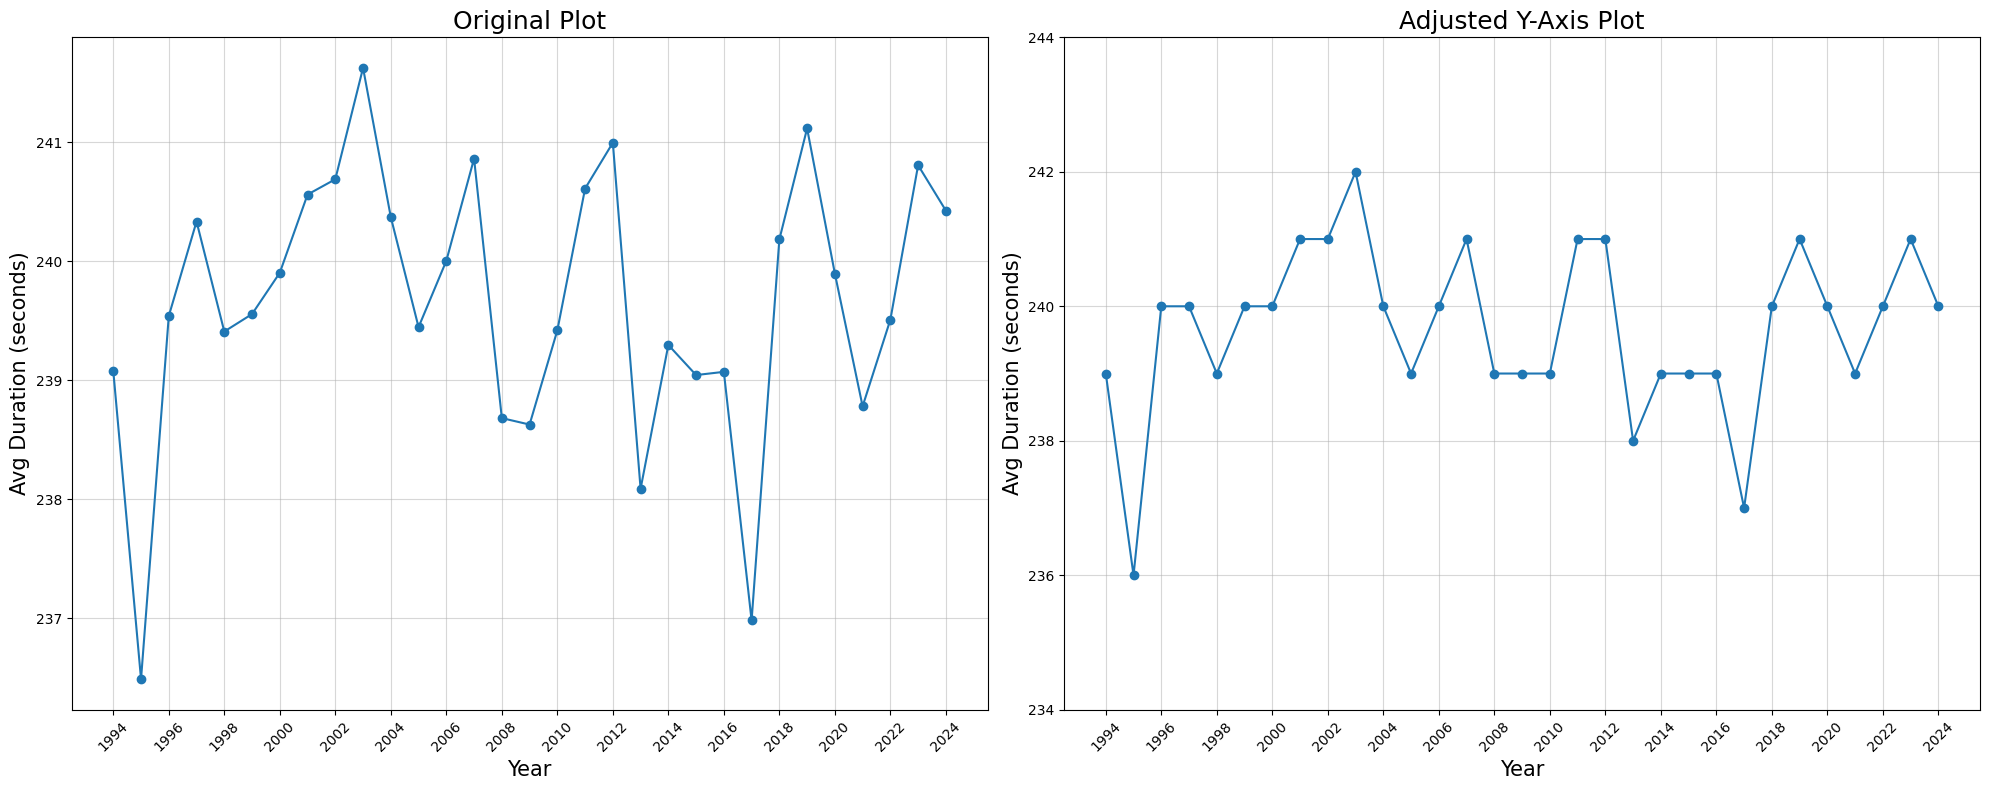

In [47]:
#Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20, 8)) #Telling the notebook I want 1 row with 3 graphs. Dimensions, if you would.

#First graph: Original line plot
ax[0].plot(avg_dur_year['release_year'], avg_dur_year['duration'], marker='o')
ax[0].set_xticks(avg_dur_year['release_year'][::2]) 
ax[0].set_xticklabels(avg_dur_year['release_year'][::2], rotation=45)
ax[0].set_xlabel("Year", fontsize=15)
ax[0].set_ylabel("Avg Duration (seconds)", fontsize=15)
ax[0].set_title("Original Plot", fontsize=18)
ax[0].grid(alpha=0.5)

#Second graph: Adjusted y-axis line plot
ax[1].plot(avg_dur_year2['release_year'], avg_dur_year2['duration'], marker='o')
ax[1].set_xticks(avg_dur_year2['release_year'][::2])  # Show every other year for clarity
ax[1].set_xticklabels(avg_dur_year2['release_year'][::2], rotation=45)
ax[1].set_ylim(avg_dur_year2['duration'].min() - 2, avg_dur_year2['duration'].max() + 2)  # Add a small buffer to make the line appear smaller
ax[1].set_xlabel("Year", fontsize=15)
ax[1].set_ylabel("Avg Duration (seconds)", fontsize=15)
ax[1].set_title("Adjusted Y-Axis Plot", fontsize=18)
ax[1].grid(alpha=0.5)

#Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


## Do newer songs tend to have higher popularity scores?

In [56]:
avg_pop_year = df.groupby('release_year')['popularity'].mean().round().astype('int').reset_index()
avg_pop_year = pd.DataFrame(avg_pop_year)
avg_pop_year

,release_year,popularity
0,1994,50
1,1995,50
2,1996,51
3,1997,52
4,1998,51
5,1999,51
6,2000,52
7,2001,51
8,2002,50
9,2003,51


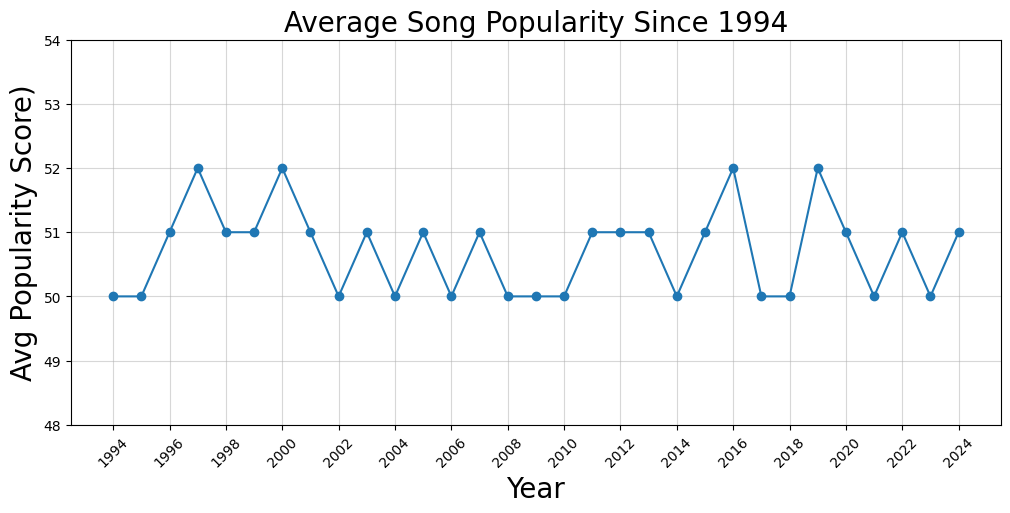

In [57]:
#I'm going to create a dataframe and line graph that track the average popularity scores over the years.
avg_pop_year = df.groupby('release_year')['popularity'].mean().round().astype('int').reset_index()
avg_pop_year = pd.DataFrame(avg_pop_year)

#Plot the dataframe
plt.figure(figsize=(12, 5))
plt.plot(avg_pop_year['release_year'], avg_pop_year['popularity'], marker='o')
plt.xticks(avg_pop_year['release_year'][::2], rotation=45)  # Show every other year for clarity
plt.ylim(48,54)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Avg Popularity Score)", fontsize=20)
plt.title("Average Song Popularity Since 1994", fontsize=20)
plt.grid(alpha=0.5)
plt.show()

Virtually no change in this dataset.

# **Popularity and Streams**
1	What drives song popularity?


## What drives song popularity?

At this point, we know the nature of this dataset so I will just demonstrate using correlation techniques to answer this question, if there is a definiteive answer.

In [58]:
#Other than the artist, popularity COULD be driven by the genre or the music label. Lets assign numeric values to the attributes before we try to correlate and use scatter plots.
#We can use Pandas "factorize" function to convert 'genre' and 'label' attributes to numeric values.
#So I dont confuse myself, I'll just add the columns to the df.
df['genre_encoded'] = pd.factorize(df['genre'])[0]
df['label_encoded'] = pd.factorize(df['label'])[0]
df[['genre','genre_encoded','label','label_encoded']].head(10)

,genre,genre_encoded,label,label_encoded
0,electronic,0,def jam,0
1,electronic,0,universal music,1
2,pop,1,universal music,1
3,hip-hop,2,sony music,2
4,pop,1,def jam,0
5,folk,3,indie,3
6,hip-hop,2,def jam,0
7,hip-hop,2,atlantic records,4
8,pop,1,warner music,5
9,electronic,0,warner music,5


In [59]:
#An easy way to view correlation is to use the .corr() function.
#Add popularity to the matrix since that's the value I'm looking for.
correlation_matrix = df[['popularity', 'genre_encoded', 'label_encoded']].corr()
print(correlation_matrix)


               popularity  genre_encoded  label_encoded
popularity       1.000000      -0.002597      -0.002764
genre_encoded   -0.002597       1.000000      -0.000938
label_encoded   -0.002764      -0.000938       1.000000


As expected with this data, there is no correlation with these attributes and popularity. But let's plot the correlation charts anyway.

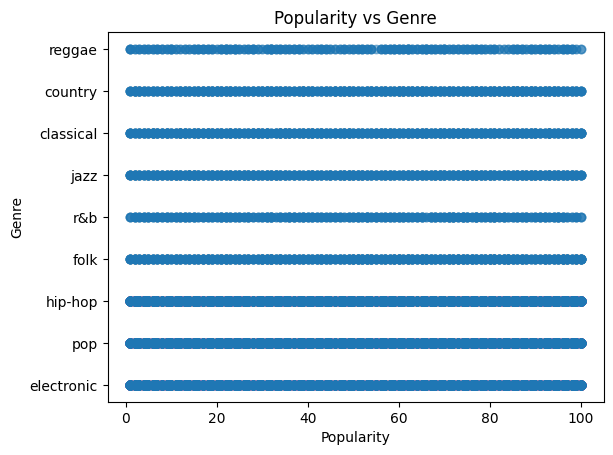

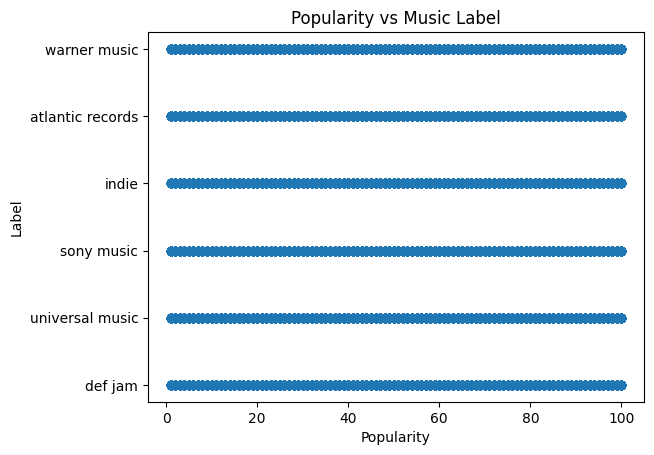

In [63]:
plt.scatter(df['popularity'], df['genre'], alpha=0.2)
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.title('Popularity vs Genre')
plt.show()

plt.scatter(df['popularity'], df['label'], alpha=0.1)
plt.xlabel('Popularity')
plt.ylabel('Label')
plt.title('Popularity vs Music Label')
plt.show()


It's hard to see but those are scatter plots. The data is too evenly distributed to see variance.

I'm going to train a linear regression model for these parameters. I expect it to perform extremely poorly due the near perfect randomness of the dataset.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['genre_encoded', 'label_encoded']]  #Features
y = df['popularity']  #Target variable

#Split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Fit Linear regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
yhat = model.predict(X_test)

#Evaluate model performance
mse = mean_squared_error(y_test, yhat) #represents the average squared difference between the actual and predicted values of popularity. A high number is a bad thing.
r2 = r2_score(y_test, yhat) #R-squared explains the proportion of variance in the target variable (popularity) that the model can explain using the features. On a scale of 0-1. We want to be close to 1.

print("Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

#Check coefficients --looks at coefficients assigned to genre_encoded and label_encoded, indicating their linear impact on popularity.
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coefficients)

Linear Regression Model Performance:
Mean Squared Error (MSE): 833.60
R-squared (R2): -0.00

Feature Coefficients:
         Feature  Coefficient
0  genre_encoded    -0.048912
1  label_encoded    -0.010047


As expected, the model performed extremely poorly. The MSE is laughably high which indicates it cannot predict any values with accuracy. The R2 indicates that the model does not explain any variance in the model. The weak coefficients indicate that the features do not impact popularity at all.

# **Coclusion and Lessons Learned**

I genuinely had fun doing this analysis. Although I wasn't able to craft genuine insights and storytelling with this data, lessons were still learned:

1. Although it was unfortunate that the dataset was perfectly random, I was able to illustrate my thought processes on how I could answer and verify my answers to questions.

2. There were a few instances where I realized I made a mistake previously in the analysis, even as early as cleaning the data, and I was able to go back and learn from my mistakes--such as not removing the hidden white spaces--which I thought was why there were so many individual artist names. -_-

3. I learned ways to simulate conditional formatting to shorten otherwise longer coding instances.

4. I realized towards the end that I was continously making other dataframes for things like calculations. This hurts the analysis a bit because if I had added that data directly to the original dataframe, a massive amount of time could be saved on revisits to the dataframe.

5. I learned the value of using subplots to plot multiple charts so I don't end up with the pie chart situation in the Genre-Based Analysis.

6. The large adjustments (they're labeled in the notebook) were extremely fruitful and demonstrated my ability to adapt and problem-solve the analysis and my intitial plans.

7. When I realized the nature of the dataset, I almost skipped attempting any machine-learning techniques. However, by doing the linear regression model, I was able to revisit and improve my knowledge on the subject.

8. There were many times when I wanted to install SQL and use that for questions. Hunkering down in Python was an invaluable experience for me.

9. Early in the analysis I did a large unnecessary step. I wanted to see the distribution of null occurences and instead of calculating percentages, I generated a count, which didn't really help at all.

I do see the incredible potential in revisting this notebook and using the real Spotify API to conduct the same analysis and demonstrate my storytelling ability. I hope you enjoyed this exploratory data analysis!

Arik Myers